# plotting the dimension-reduced laplacian and evaluating the reduced neural net

In [7]:
#this should cover all our necessary packages
import zero_network
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from plot_digits import *

## zero out some eigenvalues

In [34]:
A, L, L_reconstructed, new_net = zero_network.zero_net(np.arange(99, 150))

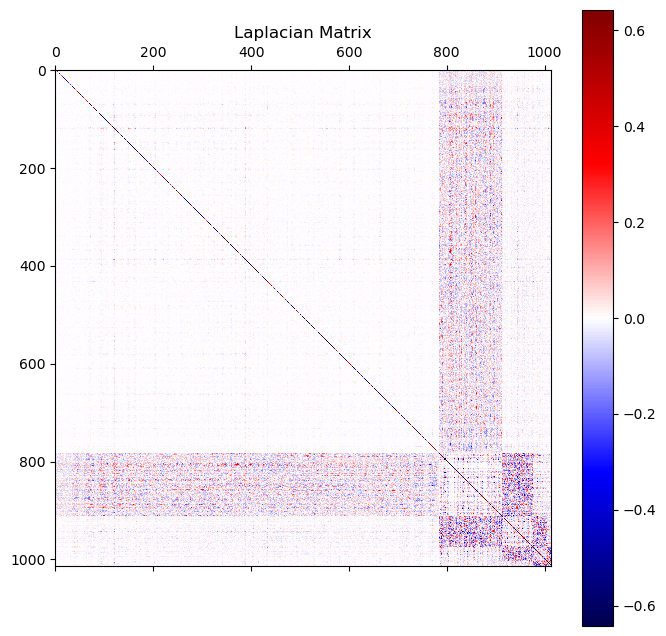

In [35]:
# plot the compressed laplacian

fig, ax = plt.subplots(figsize=(8, 8))  # Create a figure and an Axes
cax = ax.matshow(L_reconstructed, cmap='seismic', vmin = -np.max(abs(A)), vmax = np.max(abs(A)))  # Plot on the specified Axes
fig.colorbar(cax, ax=ax)  # Add colorbar to that Axes
plt.title("Laplacian Matrix")
plt.show()

## plot reduced neural net performance

313/313 [==============================] - 1s 3ms/step


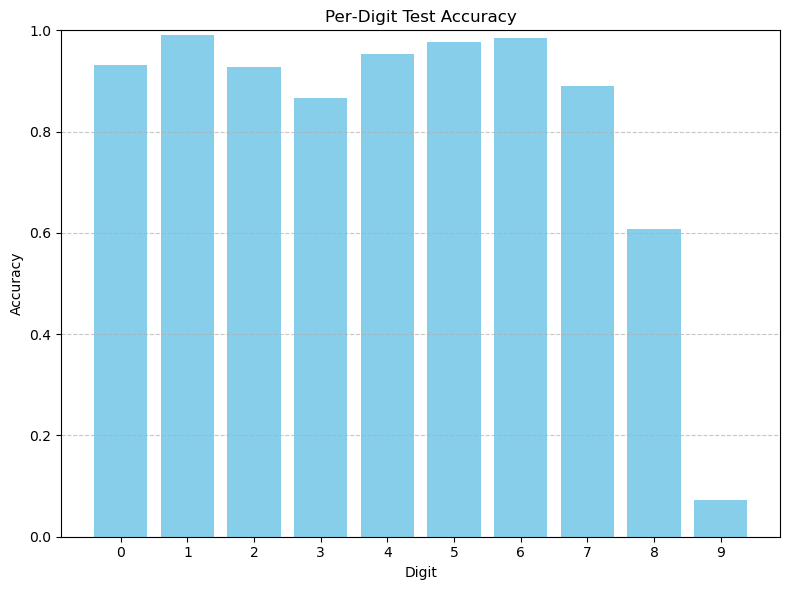

In [36]:
#first a bar chart of accuracy
plot_digits(new_net)

313/313 [==============================] - 1s 4ms/step


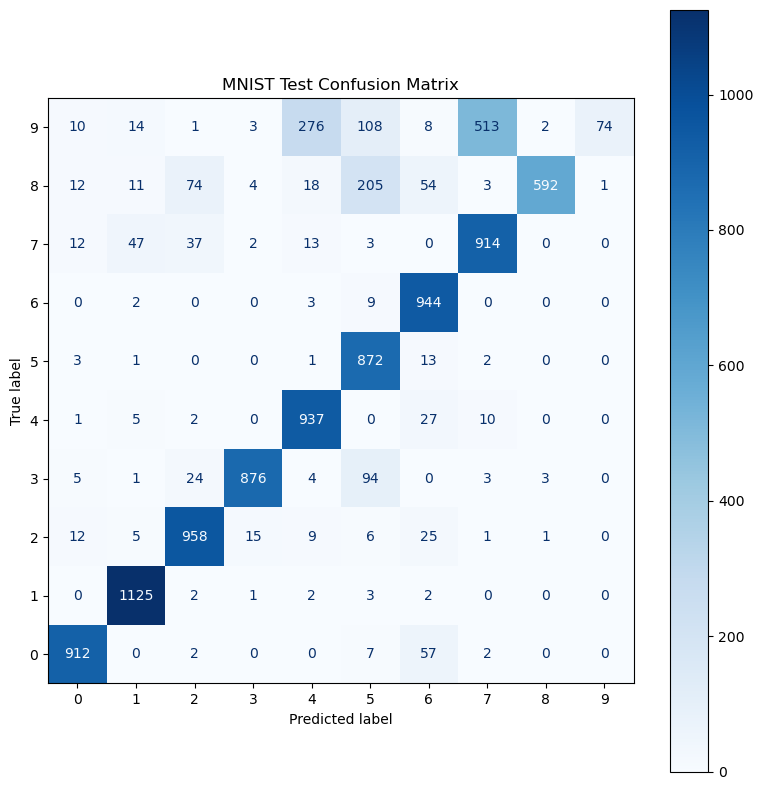

In [37]:
#then a confusion matrix
plot_confusion(new_net)

## how does MSE change with how many eigenvalues we include?

In [6]:
MSE, accuracy = evaluate_model(new_net)

313/313 [==============================] - 0s 714us/step


In [15]:
eigenvals_included = np.arange(1, 300)
MSEs = []
accuracies = []

In [16]:
for n in eigenvals_included:
    A, L, L_reconstructed, new_net = zero_network.zero_net(np.array([i for i in range(n, 1014, 1)]))
    MSE, accuracy = evaluate_model(new_net)
    MSEs.append(MSE)
    accuracies.append(accuracy)


313/313 [==============================] - 0s 691us/step


In [25]:
#base version
A, L, L_reconstructed, new_net = zero_network.zero_net()
baseMSE, baseACCURACY = evaluate_model(new_net)

313/313 [==============================] - 0s 772us/step


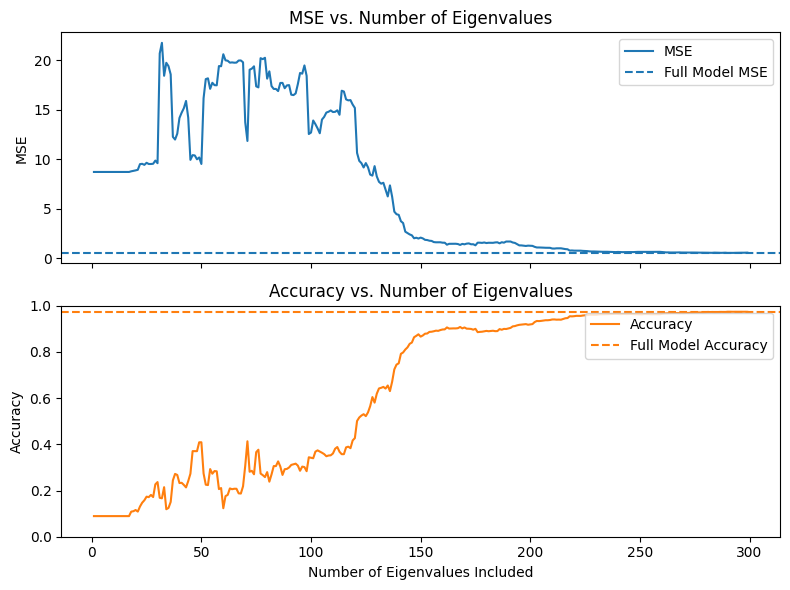

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 6))

# Top: MSE plot
ax1.plot(eigenvals_included, MSEs,       color='tab:blue', label='MSE')
ax1.axhline(baseMSE, linestyle='dashed', color='tab:blue', label='Full Model MSE')
ax1.set_ylabel("MSE")
ax1.legend(loc='upper right')
ax1.set_title("MSE vs. Number of Eigenvalues")

# Bottom: Accuracy plot
ax2.plot(eigenvals_included, accuracies, color='tab:orange', label='Accuracy')
ax2.axhline(baseACCURACY, linestyle='dashed', color='tab:orange', label='Full Model Accuracy')
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0, 1)
ax2.set_xlabel("Number of Eigenvalues Included")
ax2.legend(loc='upper right')
ax2.set_title("Accuracy vs. Number of Eigenvalues")

plt.tight_layout()
#plt.savefig("figures/Eigenmap_results.png", dpi=300)
plt.show()